In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [3]:
cal_df = downcast_dtypes(pd.read_csv('../data/calendar.csv'))
cal_df = cal_df.loc[0:1000]
print(cal_df.shape)
print(cal_df.info())
cal_df.head()

(1001, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1001 non-null   object
 1   wm_yr_wk      1001 non-null   int16 
 2   weekday       1001 non-null   object
 3   wday          1001 non-null   int16 
 4   month         1001 non-null   int16 
 5   year          1001 non-null   int16 
 6   d             1001 non-null   object
 7   event_name_1  80 non-null     object
 8   event_type_1  80 non-null     object
 9   event_name_2  2 non-null      object
 10  event_type_2  2 non-null      object
 11  snap_CA       1001 non-null   int16 
 12  snap_TX       1001 non-null   int16 
 13  snap_WI       1001 non-null   int16 
dtypes: int16(7), object(7)
memory usage: 68.6+ KB
None


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
sales_df = downcast_dtypes(pd.read_csv('../data/sales_train_evaluation.csv'))
sales_df = sales_df.loc[0:1000]
print(sales_df.shape)
print(sales_df.info())
sales_df.head()

(1001, 1947)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 1947 entries, id to d_1941
dtypes: int16(1941), object(6)
memory usage: 3.8+ MB
None


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
sell_prices_df = downcast_dtypes(pd.read_csv('../data/sell_prices.csv'))
sell_prices_df = sell_prices_df.loc[0:1000]
print(sell_prices_df.shape)
print(sell_prices_df.info())
sell_prices_df.head()

(1001, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_id    1001 non-null   object 
 1   item_id     1001 non-null   object 
 2   wm_yr_wk    1001 non-null   int16  
 3   sell_price  1001 non-null   float32
dtypes: float32(1), int16(1), object(2)
memory usage: 21.6+ KB
None


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [6]:
CA_df = downcast_dtypes((sales_df[sales_df['state_id'] == 'CA']).copy())
CA_df = CA_df.loc[0:1000]
CA_df.info()
CA_df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Columns: 1947 entries, id to d_1941
dtypes: int16(1941), object(6)
memory usage: 3.8+ MB


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
996,HOUSEHOLD_1_441_CA_1_evaluation,HOUSEHOLD_1_441,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,3,8,6,3,7,4,3,4,9,6
997,HOUSEHOLD_1_442_CA_1_evaluation,HOUSEHOLD_1_442,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
998,HOUSEHOLD_1_443_CA_1_evaluation,HOUSEHOLD_1_443,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,4,2,2,2,0,1,3,0,2,2
999,HOUSEHOLD_1_444_CA_1_evaluation,HOUSEHOLD_1_444,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,0,2,0,1,2,0,0,0,0
1000,HOUSEHOLD_1_445_CA_1_evaluation,HOUSEHOLD_1_445,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,0,0,0,...,2,5,4,3,1,4,3,1,3,4


In [7]:
CA_df_melted = downcast_dtypes(CA_df.melt(id_vars=['id','item_id', 'dept_id', 
                                                     'cat_id', 'store_id', 
                                                     'state_id']))
CA_df_melted.rename({'variable':'day', 'value':'qty'}, axis=1, inplace=True)
CA_df_melted.info()
CA_df_melted.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942941 entries, 0 to 1942940
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   id        object
 1   item_id   object
 2   dept_id   object
 3   cat_id    object
 4   store_id  object
 5   state_id  object
 6   day       object
 7   qty       int16 
dtypes: int16(1), object(7)
memory usage: 107.5+ MB


,id,item_id,dept_id,cat_id,store_id,state_id,day,qty
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [8]:
CA_df_joined = downcast_dtypes(pd.merge(cal_df, CA_df_melted, how='right', 
                          left_on='d', right_on='day'))
CA_df_joined = downcast_dtypes(pd.merge(CA_df_joined, sell_prices_df, how='left', 
                          on=['store_id', 'item_id', 'wm_yr_wk']))
# And not forget to drop snap_WI and snap_TX column
CA_df_joined.drop(columns=['snap_TX', 'snap_WI'])
CA_df_joined.info()
CA_df_joined.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942941 entries, 0 to 1942940
Data columns (total 23 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   wm_yr_wk      float32
 2   weekday       object 
 3   wday          float32
 4   month         float32
 5   year          float32
 6   d             object 
 7   event_name_1  object 
 8   event_type_1  object 
 9   event_name_2  object 
 10  event_type_2  object 
 11  snap_CA       float32
 12  snap_TX       float32
 13  snap_WI       float32
 14  id            object 
 15  item_id       object 
 16  dept_id       object 
 17  cat_id        object 
 18  store_id      object 
 19  state_id      object 
 20  day           object 
 21  qty           int16  
 22  sell_price    float32
dtypes: float32(8), int16(1), object(14)
memory usage: 285.4+ MB


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_WI,id,item_id,dept_id,cat_id,store_id,state_id,day,qty,sell_price
1942936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,HOUSEHOLD_1_441_CA_1_evaluation,HOUSEHOLD_1_441,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,6,NaN
1942937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,HOUSEHOLD_1_442_CA_1_evaluation,HOUSEHOLD_1_442,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,0,NaN
1942938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,HOUSEHOLD_1_443_CA_1_evaluation,HOUSEHOLD_1_443,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,2,NaN
1942939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,HOUSEHOLD_1_444_CA_1_evaluation,HOUSEHOLD_1_444,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,0,NaN
1942940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,HOUSEHOLD_1_445_CA_1_evaluation,HOUSEHOLD_1_445,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,4,NaN


In [9]:
CA_df_joined['total_sales'] = CA_df_joined['qty'] * CA_df_joined['sell_price']
CA_df_joined.info()
CA_df_joined.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942941 entries, 0 to 1942940
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   wm_yr_wk      float32
 2   weekday       object 
 3   wday          float32
 4   month         float32
 5   year          float32
 6   d             object 
 7   event_name_1  object 
 8   event_type_1  object 
 9   event_name_2  object 
 10  event_type_2  object 
 11  snap_CA       float32
 12  snap_TX       float32
 13  snap_WI       float32
 14  id            object 
 15  item_id       object 
 16  dept_id       object 
 17  cat_id        object 
 18  store_id      object 
 19  state_id      object 
 20  day           object 
 21  qty           int16  
 22  sell_price    float32
 23  total_sales   float32
dtypes: float32(9), int16(1), object(14)
memory usage: 292.8+ MB


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,id,item_id,dept_id,cat_id,store_id,state_id,day,qty,sell_price,total_sales
1942936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HOUSEHOLD_1_441_CA_1_evaluation,HOUSEHOLD_1_441,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,6,NaN,NaN
1942937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HOUSEHOLD_1_442_CA_1_evaluation,HOUSEHOLD_1_442,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,0,NaN,NaN
1942938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HOUSEHOLD_1_443_CA_1_evaluation,HOUSEHOLD_1_443,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,2,NaN,NaN
1942939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HOUSEHOLD_1_444_CA_1_evaluation,HOUSEHOLD_1_444,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,0,NaN,NaN
1942940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HOUSEHOLD_1_445_CA_1_evaluation,HOUSEHOLD_1_445,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1941,4,NaN,NaN


In [10]:
CA_sales_daily_per_store = downcast_dtypes(CA_df_joined.groupby(['store_id', 'date'], 
                                          as_index=False).agg(total_sales=('total_sales','sum')))
CA_sales_daily_per_store['date'] = pd.to_datetime(CA_sales_daily_per_store['date'])
CA_combined= downcast_dtypes(CA_sales_daily_per_store.pivot(index='date', columns='store_id', values='total_sales'))
CA_combined.info()
CA_combined.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1001 entries, 2011-01-29 to 2013-10-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CA_1    1001 non-null   float32
dtypes: float32(1)
memory usage: 11.7 KB


store_id,CA_1
date,
2013-10-21,9.28
2013-10-22,4.64
2013-10-23,9.28
2013-10-24,7.72
2013-10-25,19.60


<AxesSubplot:xlabel='date'>

<Figure size 1440x720 with 0 Axes>

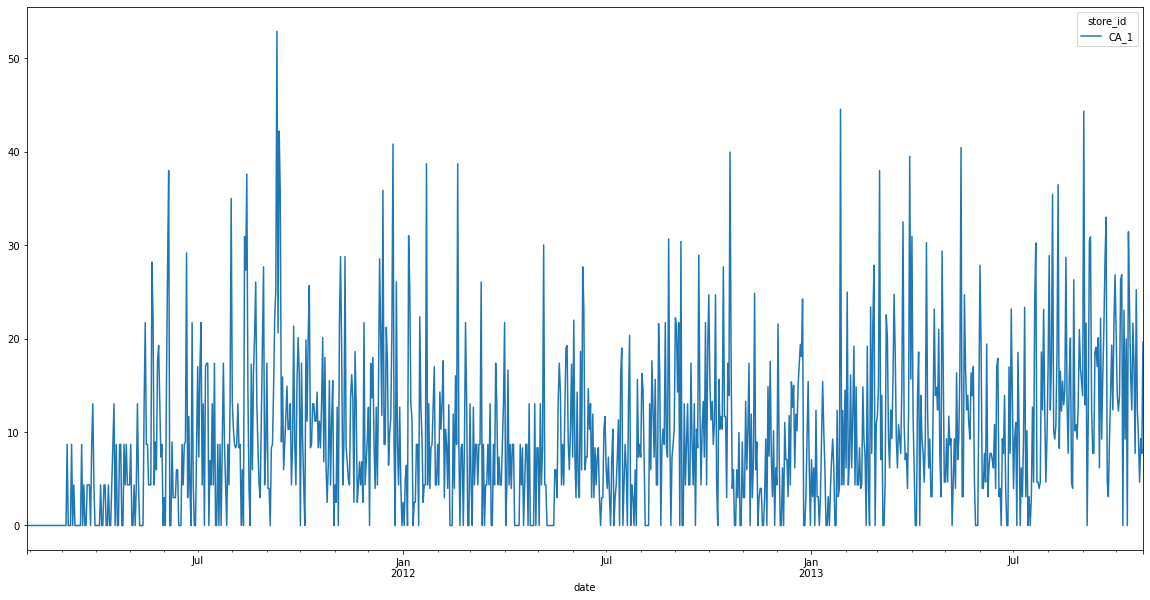

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
CA_combined.plot()

KeyError: 'CA_2'

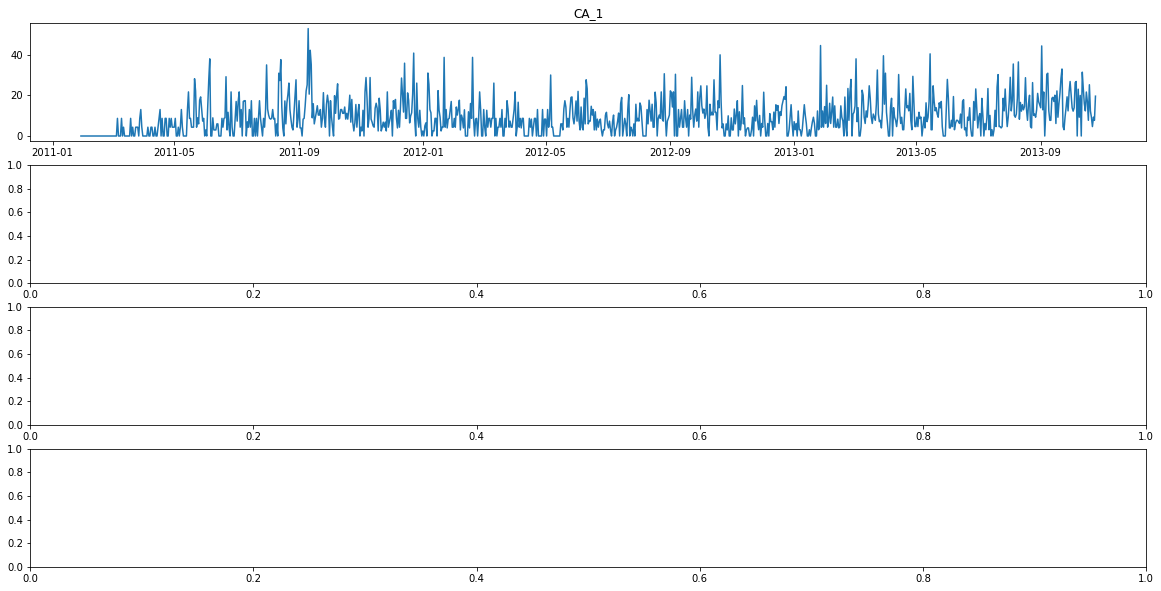

In [12]:
# Let's look in each store for more information.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(CA_combined['CA_1'])
ax1.set_title('CA_1')
ax2.plot(CA_combined['CA_2'])
ax2.set_title('CA_2')
ax3.plot(CA_combined['CA_3'])
ax3.set_title('CA_3')
ax4.plot(CA_combined['CA_4'])
ax4.set_title('CA_4')

Text(0.5, 1.0, 'Monthly Sale From Jan-2011 to May-2016')

<Figure size 1440x720 with 0 Axes>

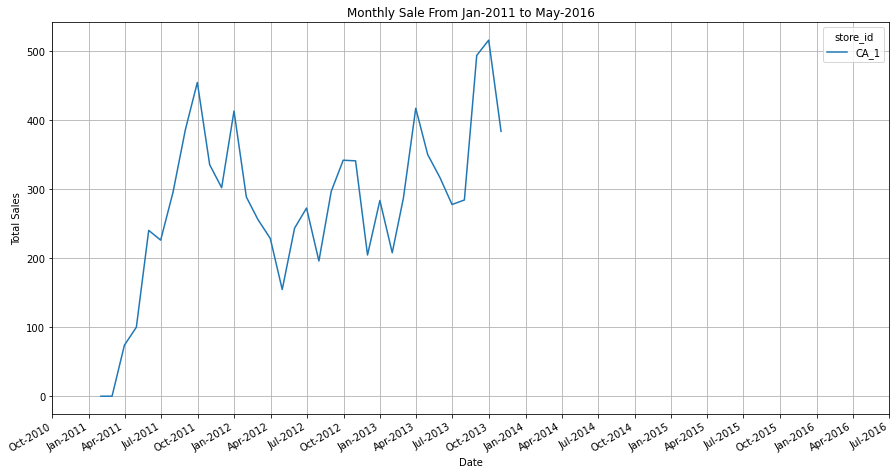

In [13]:
import datetime
import matplotlib.dates as mdates
plt.figure()
CA_combined.resample('M').sum().plot(legend=True,
                figsize=(15,8),
                xlim=[datetime.datetime(2010,10,1),datetime.datetime(2016,7,1)],
                grid=True,
                ylabel="Total Sales",
                xlabel="Date",
                x_compat=True)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_title("Monthly Sale From Jan-2011 to May-2016")

In [14]:
CA_sales_daily_per_categories = CA_df_joined.groupby(['cat_id', 'date'], 
                                          as_index=False).agg(total_sales=('total_sales','sum'))
CA_sales_daily_per_categories['date'] = pd.to_datetime(CA_sales_daily_per_categories['date'])
CA_cat_combined= CA_sales_daily_per_categories.pivot(index='date', columns='cat_id', values='total_sales')
CA_cat_combined

cat_id,HOBBIES,HOUSEHOLD
date,,
2011-01-29,0.00,0.0
2011-01-30,0.00,0.0
2011-01-31,0.00,0.0
2011-02-01,0.00,0.0
2011-02-02,0.00,0.0
...,...,...
2013-10-21,9.28,0.0
2013-10-22,4.64,0.0
2013-10-23,9.28,0.0


<AxesSubplot:xlabel='date'>

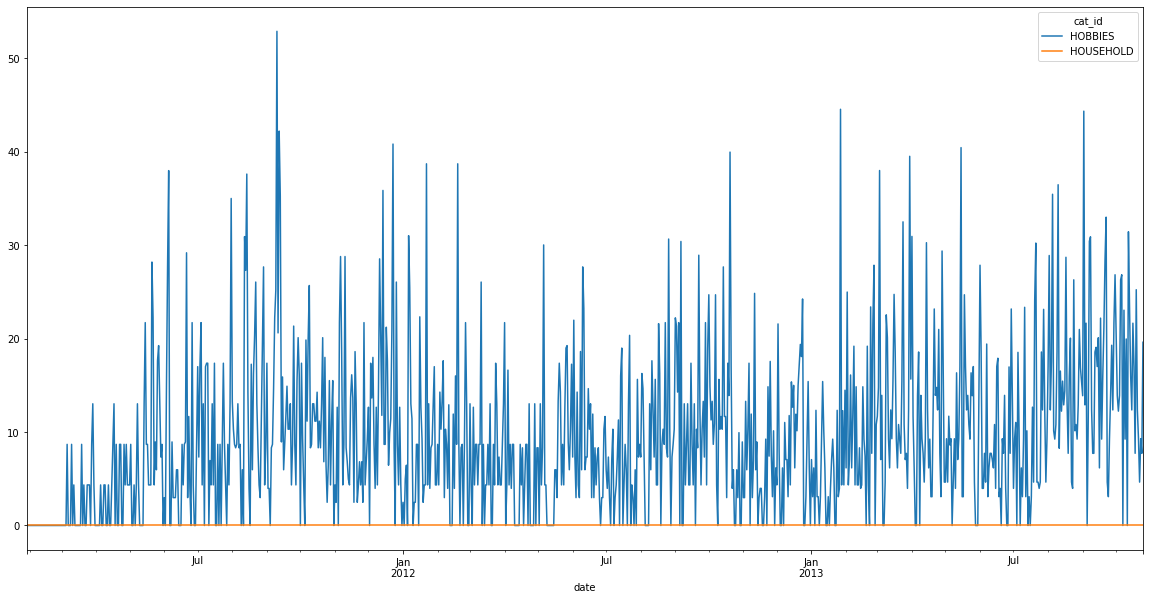

In [15]:
CA_cat_combined.plot()

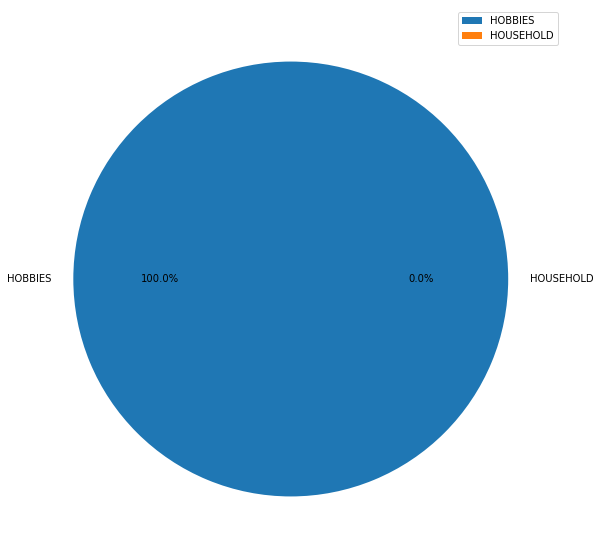

In [21]:
#total_FOODS_sales = CA_cat_combined['FOODS'].sum()
total_HOBBIES_sales = CA_cat_combined['HOBBIES'].sum()
total_HOUSEHOLD_sales = CA_cat_combined['HOUSEHOLD'].sum()
pie_list = [total_HOBBIES_sales, total_HOUSEHOLD_sales]
labels = ['HOBBIES', 'HOUSEHOLD']
plt.pie(pie_list, labels=labels, autopct='%1.1f%%')
plt.legend()
plt.show()

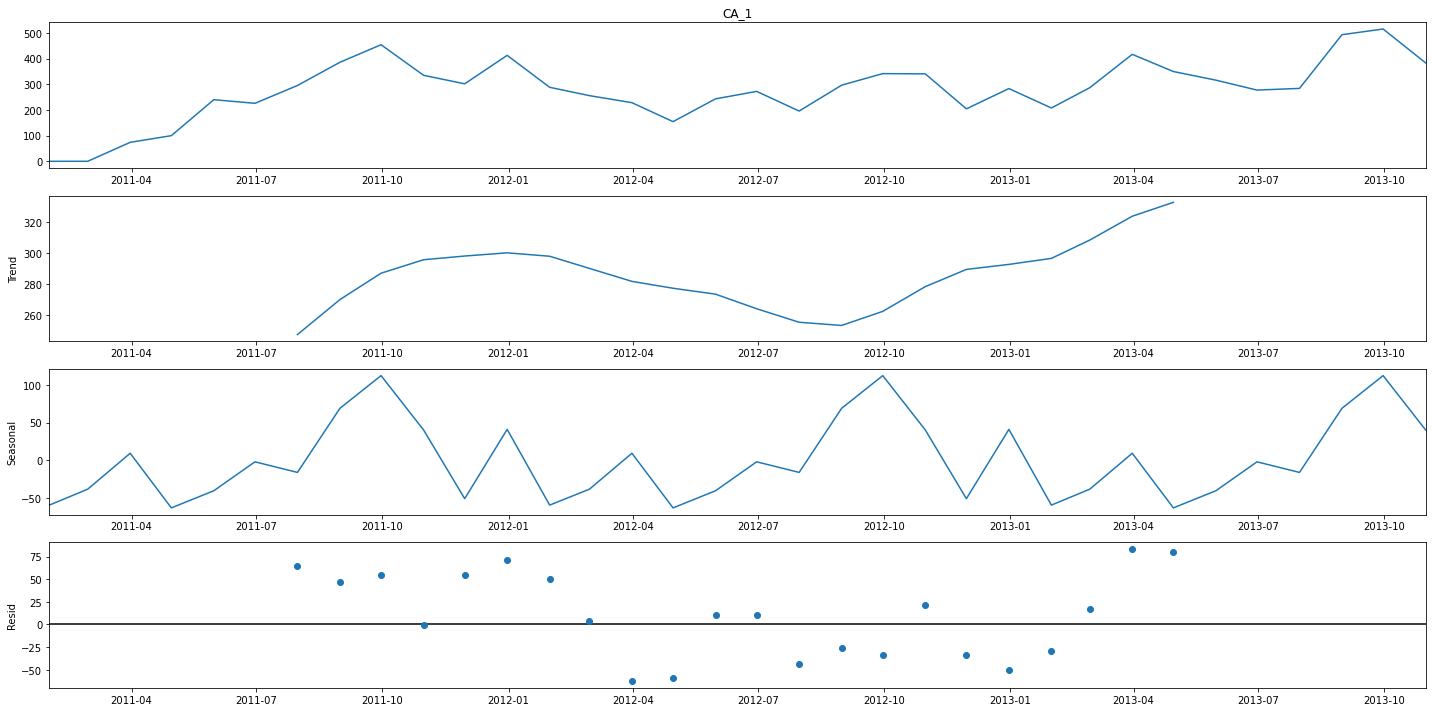

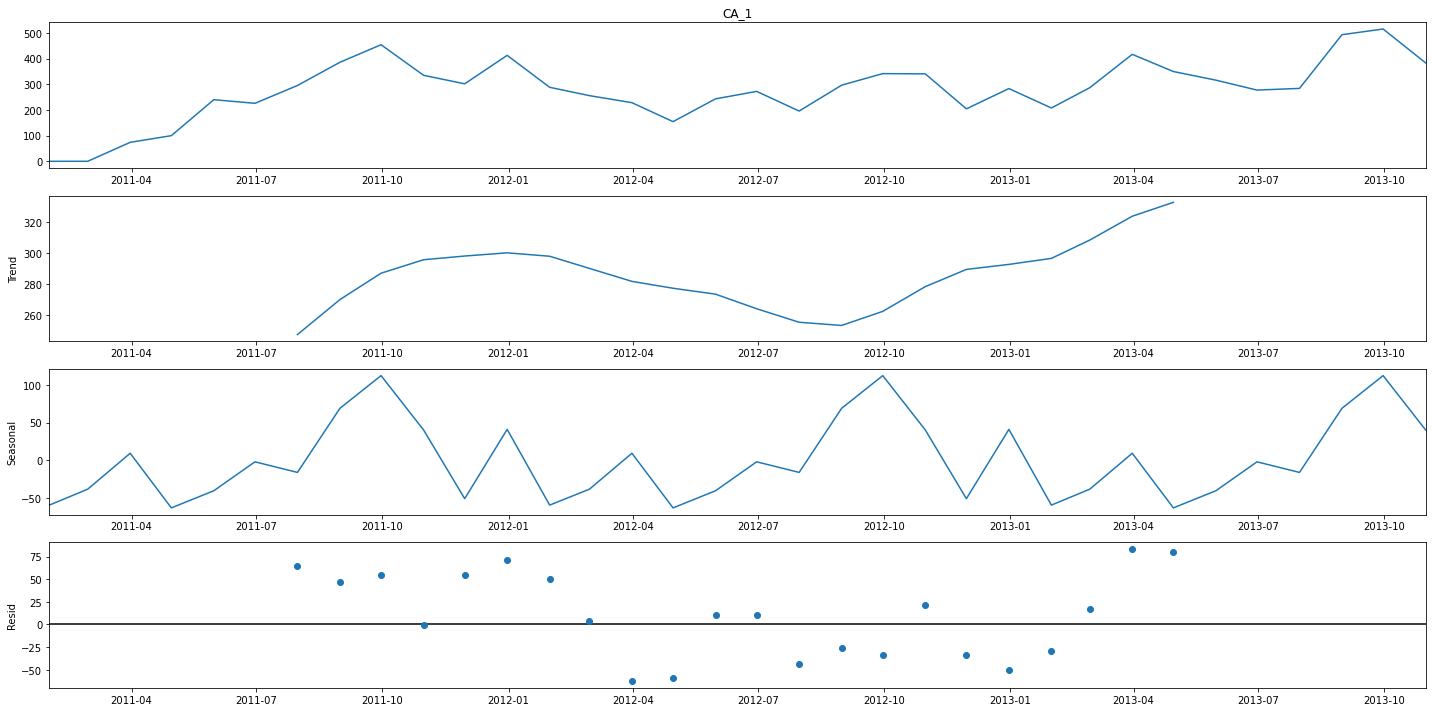

In [22]:
import statsmodels.api as sm
store_decomposed = sm.tsa.seasonal_decompose(CA_combined.resample('M').sum()['CA_1'])
store_decomposed.plot()